In [10]:
%run data_cleaning.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date     

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [12]:
cleaned_df = merged_df.drop(['start_year','original_title','id','movie'],axis=1)

grouped_df = cleaned_df.groupby('director_name').agg(
    {'movie_id': ['count'],
    'primary_title': lambda x: list(x),
     'production_budget': ['sum', 'mean'], 
     'worldwide_gross': ['sum', 'mean'],
     'Profit:Production Ratio': ['sum', 'mean'],
     'Profit': ['sum', 'mean']}
)

grouped_df.columns = [
    f"{col[0]}_{col[1]}" for col in grouped_df.columns
]

grouped_df[grouped_df['movie_id_count']>0].sort_values(by=['Profit:Production Ratio_mean'],ascending=False)

,movie_id_count,primary_title_<lambda>,production_budget_sum,production_budget_mean,worldwide_gross_sum,worldwide_gross_mean,Profit:Production Ratio_sum,Profit:Production Ratio_mean,Profit_sum,Profit_mean
director_name,,,,,,,,,,
Tod Williams,1,[Paranormal Activity 2],3000000,3000000.0,177512032,177512032.0,58.170677,58.170677,174512032,174512032.0
William Brent Bell,2,"[The Devil Inside, The Boy]",11000000,5500000.0,169980442,84990221.0,106.581585,53.290793,158980442,79490221.0
Bradley Parker,1,[Chernobyl Diaries],1000000,1000000.0,42411721,42411721.0,41.411721,41.411721,41411721,41411721.0
Jordan Peele,2,"[Get Out, Us]",25000000,12500000.0,509578261,254789130.5,61.784106,30.892053,484578261,242289130.5
Nitesh Tiwari,1,[Dangal],9500000,9500000.0,294654618,294654618.0,30.016276,30.016276,285154618,285154618.0
...,...,...,...,...,...,...,...,...,...,...
Tara Subkoff,1,[#Horror],1500000,1500000.0,0,0.0,-1.000000,-1.000000,-1500000,-1500000.0
Mahmoud Behraznia,1,[The Prince],18000000,18000000.0,0,0.0,-1.000000,-1.000000,-18000000,-18000000.0
Anthony O'Brien,1,[The Timber],2100000,2100000.0,0,0.0,-1.000000,-1.000000,-2100000,-2100000.0


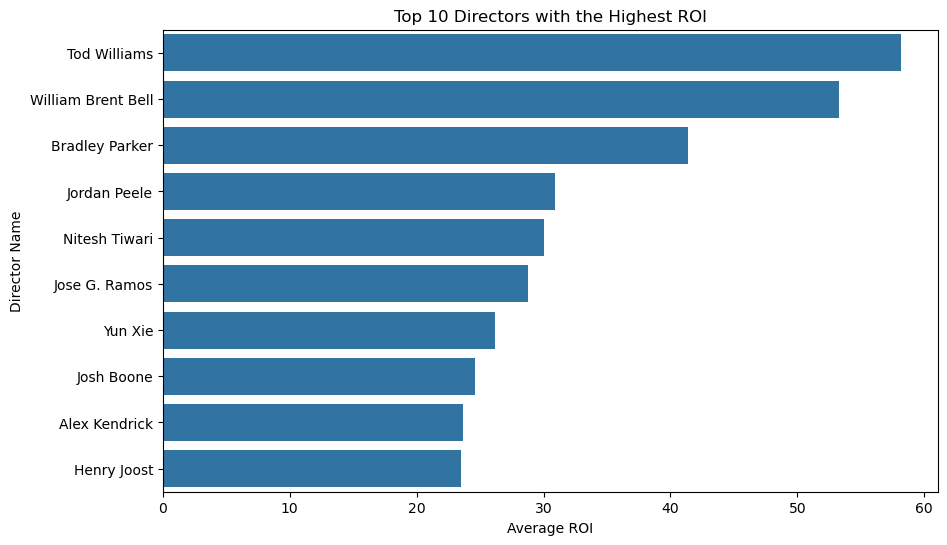

In [13]:
sorted_profit = grouped_df.reset_index().sort_values(by='Profit:Production Ratio_mean', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Profit:Production Ratio_mean', y='director_name', data=sorted_profit.head(10))

# Set the title and labels
plt.title('Top 10 Directors with the Highest ROI')
plt.xlabel('Average ROI')
plt.ylabel('Director Name')

plt.savefig('../images/top 10 directors by ROI.png')

plt.show()


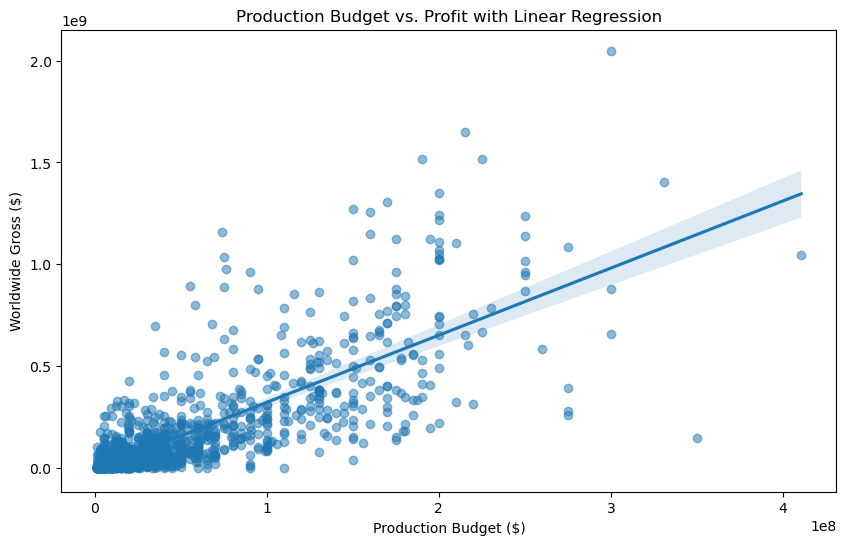

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='worldwide_gross', data=merged_df, scatter_kws={'alpha':0.5})
plt.title('Production Budget vs. Profit with Linear Regression')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')

plt.savefig('../images/production vs gross regression.png')
plt.show()

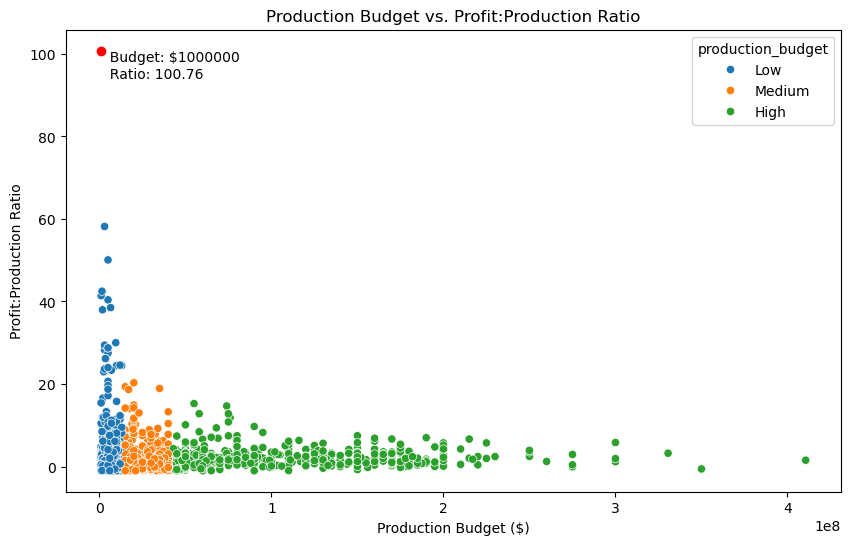

In [15]:
merged_df['Worldwide Gross:Production Ratio'] = merged_df['worldwide_gross'] / merged_df['production_budget']
low_budget_threshold = merged_df['production_budget'].quantile(0.33)
medium_budget_threshold = merged_df['production_budget'].quantile(0.66)

# Assigning categories based on these thresholds
budget_categories = pd.cut(merged_df['production_budget'], 
                           bins=[0, low_budget_threshold, medium_budget_threshold, merged_df['production_budget'].max()], 
                           labels=['Low', 'Medium', 'High'])
# Plotting Production Budget vs. Worldwide Gross:Production Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='Profit:Production Ratio', hue=budget_categories, data=merged_df)
plt.title('Production Budget vs. Profit:Production Ratio')
plt.xlabel('Production Budget ($)')
plt.ylabel('Profit:Production Ratio')

# Highlighting the point with the maximum ratio
max_efficiency_point = merged_df.loc[merged_df['Worldwide Gross:Production Ratio'].idxmax()]
plt.scatter(max_efficiency_point['production_budget'], max_efficiency_point['Profit:Production Ratio'], color='red')
plt.text(max_efficiency_point['production_budget'], max_efficiency_point['Profit:Production Ratio'], 
         f"  Budget: ${int(max_efficiency_point['production_budget'])}\n  Ratio: {max_efficiency_point['Profit:Production Ratio']:.2f}", 
         verticalalignment='top')

plt.savefig('../images/production vs ratio scatter.png')

plt.show()

In [16]:
X = merged_df[['production_budget']].values.reshape(-1, 1) 
y = merged_df['worldwide_gross'].values


model = LinearRegression()
model.fit(X, y)

# Predicting the profits
y_pred = model.predict(X)

# Calculating the R-squared value
r_squared = r2_score(y, y_pred)

print(f'R-squared value: {r_squared}')

R-squared value: 0.6132180960157105


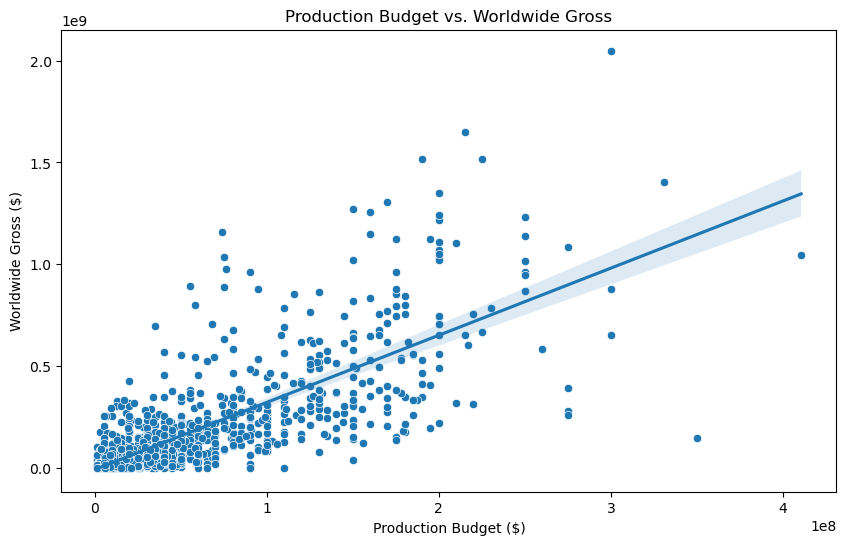

In [17]:
# Overall Regression Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=merged_df)
sns.regplot(x='production_budget', y='worldwide_gross', data=merged_df, scatter=False)

plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')

plt.savefig('../images/production vs gross .png')
plt.show()

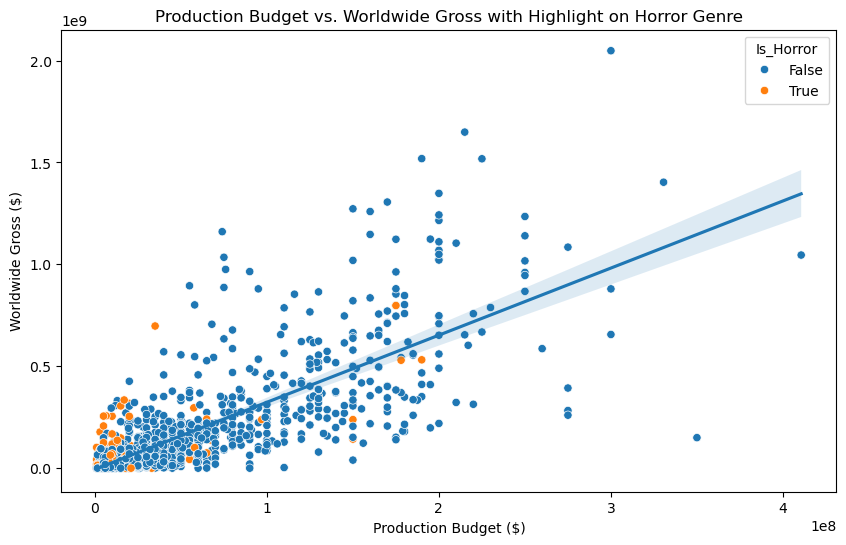

In [18]:
# Horror Regression Plot
merged_df['Is_Horror'] = merged_df['genres'].str.contains('Horror', na=False)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='worldwide_gross', hue = 'Is_Horror',data=merged_df)
sns.regplot(x='production_budget', y='worldwide_gross', data=merged_df, scatter=False)

plt.title('Production Budget vs. Worldwide Gross with Highlight on Horror Genre')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')

plt.savefig('../images/production vs gross .png')
plt.show()

In [20]:
wes_df = merged_df
wes_df

,movie_id,start_year,primary_title,original_title,genres,runtime_minutes,director_name,writer_name,actors,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,Profit,Profit:Production Ratio,Worldwide Gross:Production Ratio,Is_Horror
0,tt0249516,2012,Foodfight!,Foodfight!,"Action,Animation,Comedy",91.0,Lawrence Kasanoff,Sean Catherine Derek,Charlie Sheen,26,2012-12-31,Foodfight!,45000000,0,73706,2012,-44926294,-0.998362,0.001638,False
1,tt0359950,2013,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,None,Steve Conrad,"Ben Stiller, Jon Daly",37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013,96861183,1.064409,2.064409,False
2,tt0365907,2014,A Walk Among the Tombstones,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,Scott Frank,Lawrence Block,"Liam Neeson, David Harbour, Dan Stevens, Boyd ...",67,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,2014,34108587,1.218164,2.218164,False
3,tt0369610,2015,Jurassic World,Jurassic World,"Action,Adventure,Sci-Fi",124.0,Colin Trevorrow,Rick Jaffa,"Chris Pratt, Ty Simpkins",34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,1433854864,6.669092,7.669092,False
4,tt0376136,2011,The Rum Diary,The Rum Diary,"Comedy,Drama",119.0,Bruce Robinson,Hunter S. Thompson,"Johnny Depp, Giovanni Ribisi, Aaron Eckhart, M...",16,2011-10-28,The Rum Diary,45000000,13109815,21544732,2011,-23455268,-0.521228,0.478772,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,tt8155288,2019,Happy Death Day 2U,Happy Death Day 2U,"Drama,Horror,Mystery",100.0,Christopher Landon,Scott Lobdell,"Israel Broussard, Suraj Sharma, Phi Vu",78,2019-02-13,Happy Death Day 2U,9000000,28051045,64179495,2019,55179495,6.131055,7.131055,True
1541,tt8266310,2019,Blinded by the Light,Blinded by the Light,"Biography,Comedy,Drama",117.0,Gurinder Chadha,Sarfraz Manzoor,"Kulvinder Ghir, Aaron Phagura, Viveik Kalra",64,2019-08-14,Blinded by the Light,15000000,0,0,2019,-15000000,-1.000000,0.000000,False
1544,tt8632862,2018,Fahrenheit 11/9,Fahrenheit 11/9,Documentary,128.0,Michael Moore,None,None,29,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715,2018,1653715,0.330743,1.330743,False
1545,tt8852552,2010,Icarus,Icarus,Thriller,78.0,Maarten Diederen,Emile Beulen,None,91,2010-02-09,Icarus,6000000,0,0,2010,-6000000,-1.000000,0.000000,False
